# Deeltjes model

Zoom je heel ver in, dan zie je deeltjes rond vliegen.
Elk met een eigen massa, een eigen snelheid en richting.
De deeltjes botsen onderling, wisselen energie uit.
We zouden op basis van een botsingsmodel van deeltjes iets moeten kunnen leren over thermodynamica.
In de thermodynamica gaat het dan om heel veel deeltjes. Maar laten we beginnen met twee botsende 'deeltjes'.

```{exercise}
:label: ex-deeltjes-1
Bekijk onderstaande video.
```

```{iframe} https://www.youtube.com/embed/HEfHFsfGXjs?si=g37KWYOi0LqmuAkD
```

Je raadt het misschien al... deze simulatie gaan we na bouwen!
Daarbij maken we gebruik van Python classes uit het vorige hoofdstuk en de basics van simulaties geleerd in Q1.
Zorg er dus voor dat je weet hoe dit werkt!
We maken ook gebruik van plotten, en daarbovenop een animatie.
Hoe de animatie precies werkt en hoe je die zelf maakt hoef je niet te weten.
Je zou wel in staat moeten zijn de code te lezen.

In de onderstaande cell maken we de ParticleClass aan, en geven we enkele parameters van onze simulatie op.

In [1]:
# Importeren van libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Maken van de class
class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                         
        self.v = np.array(v, dtype=float)  
        self.r = np.array(r, dtype=float)  
        self.R = np.array(R, dtype=float)  

    def update_position(self):
        self.r += self.v * dt

# Simulation parameters
dt = 0.1                                                            # tijd stap
num_steps = 500                                                     # aantal te nemen stappen
particle = ParticleClass(m=1.0, v=[5.0, 0], r=[0.0, 0.0], R=1.0)    # het maken van ons deeltje


```{note} dt
In bovenstaande update_position functie hebben we de tijdstap niet als inputvariabele meegegeven, waarbij we dat in de eerdere module wel hebben gedaan.
In deze module gaan we er vanuit dat de tijdstap altijd hetzelfde is voor alle deeltjes in de simulatie.
Daarom definiëren we de tijdstap als een globale variabele in de simulatie.
```

We hebben nu een deeltje met massa, een snelheid, een begin positie en een straal.
We hebben ook al de stapgrootte bepaald!

We willen de beweging van dat deeltje straks bestuderen en moeten dus een plot maken:

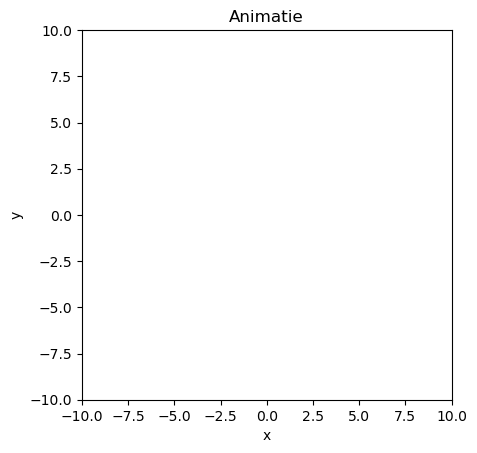

In [2]:
# Creeer een figuur en de assen
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_title("Animatie")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Toon het deeltje als een rode stip
dot, = ax.plot([], [], 'ro', markersize=10); # semicolon to suppress output

Bij het aanmaken van ons deeltje hebben we het deeltje een beginpositie en snelheid mee gegeven.
Als we dan per tijdstap de positie bepalen en deze laten plotten en die plots achter elkaar plakken, dan krijgen we een animatie van het deeltje.
Met FuncAnimation wordt die animatie voor ons gedaan.

In [ ]:
# Initialisieren van de functie voor de animatie
def init():
    dot.set_data([], [])
    return dot,

# Updaten van de functie voor elk frame
def update(frame):
    particle.update_position()
    dot.set_data([particle.r[0]], [particle.r[1]])
    return dot,

# Creeer de animatie
ani = FuncAnimation(fig, update, frames=range(200), init_func=init, blit=True, interval=50)

# Omdat we werken met Jup. Notebooks (en niet een .py file)
from IPython.display import HTML
HTML(ani.to_jshtml())


`Frames` in FuncAnimation verwijst naar het totaal aantal frames dat gebruikt wordt.
`Interval` naar de snelheid van de animatie, nl. 50 milliseconden ofwel 20 frames per seconde.

Merk op dat als we de laatste cel opnieuw runnen, het deeltje zich niet in de oorsprong bevindt.
Dat is een 'eigenaardigheid' van Jupyter Notebooks.
Het is nu beter om alle code in één cel te plaatsen (hieronder gedaan voor je), zodat we ervoor zorgen dat het deeltje altijd in de oorsprong begint.


In [ ]:
# Simulation parameters
dt = 0.1         # time step
num_steps = 500  # number of time steps
particle = ParticleClass(m=1.0, v=[5.0, 0], r=[0.0, 0.0],R=1.0)  

# Create the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_title("Particle Animation")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Create the particle as a red dot
dot, = ax.plot([], [], 'ro', markersize=10)

# Initialization function for animation
def init():
    dot.set_data([], [])
    return dot,

# Update function for each frame
def update(frame):
    particle.update_position()
    dot.set_data([particle.r[0]], [particle.r[1]])
    return dot,

# Create animation
ani = FuncAnimation(fig, update, frames=range(200), init_func=init, blit=True, interval=50)

# For Jupyter notebook:
from IPython.display import HTML
HTML(ani.to_jshtml())


Een van de dingen die je kunt opmerken, is dat het deeltje niet in zijn doos blijft.

```{exercise} Doorlopende doos
:label: ex-deeltjesmodel-2
Verander de code zodat de doos een aaneengesloten doos is; als hij links eruit vliegt, komt hij er rechts in (en vice versa).
Een goede plek, voor nu, om dit te doen is in de update functie.
```

```{exercise} Harde wanden
:label: ex-deeltjesmodel-3
Een tweede optie is dat we een doos hebben met harde wanden.
Op het moment dat het deeltje de wand raakt, wordt deze gereflecteerd.
Schrijf de code zodat het deeltje in zijn doos blijft, waarbij de doos harde wanden heeft.
Om je vorige code te bewaren kun je er een comment van maken (#).
```

In [ ]:
# doorlopende doos

#your code/answer


In [ ]:
# doos met harde wanden

#your code/answer


```{exercise} Een deeltje dat botst tegen alle wanden
:label: ex-deeltjesmodel-4

Verander nu de code zodanig dat de beginsnelheid gegeven wordt door $\vec{v}=5\hat{x} + 3\hat{y}$ en het deeltje botst tegen alle muren.
```

In [ ]:
#your code/answer


Laten we teruggaan naar ons deeltje.
Er is een functie om de positie bij te werken, hoewel de snelheid hetzelfde lijkt te blijven... kunnen we de snelheid veranderen door (bijvoorbeeld) de versnelling door de zwaartekracht?

```{exercise} Met zwaartekracht aan
:label: ex-deeltjesmodel-5

Hieronder is de ParticleClass aangepast zodat er gebruik gemaakt kan worden van een versnelling.
Maak de simulatie van het deeltje zodat het zich beweegt in een zwaartekrachtsveld met $a = -9.81\hat{y}$. 
```

In [ ]:
# Maken van de class met versnelling
class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                  # mass of the particle
        self.v = np.array(v, dtype=float)  # velocity vector
        self.r = np.array(r, dtype=float)  # position vector
        self.R = np.array(R, dtype=float)  # radius of the particle

    def update_position(self):
        self.r += self.v * dt
    
    def update_velocity(self, a):
        self.v += a*dt
        

In [ ]:
#your code/answer


```{exercise} Limiet van numeriek model
:label: ex-deeltjesmodel-6

Wat valt je op aan het behoud van energie?!
Herinner wat we in Q1 hebben gedaan bij de basics van een numerieke simulatie...
```  


```{solution} ex-deeltjesmodel-6
Jouw antwoord hier...
```

Een optie om de simulatie te verbeteren is de tijdstap $\Delta t$ kleiner te maken, maar dan hebben we ook meer geduld meer nodig - het aantal berekeningen schaalt met $\frac{1}{\Delta t}$.
Een tweede optie is een meer directe oplossing: We weten dat $a = const.$ en daarom weten we ook de bewegingsvergelijking van het deeltje!

Daarnaast willen we graag weten waar het deeltje is geweest, dat is in onderstaande code toegevoegd.

In [ ]:
# Maken van de class met versnelling
class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                  
        self.v = np.array(v, dtype=float)  
        self.r = np.array(r, dtype=float)  
        self.R = np.array(R, dtype=float)  

    def update_position(self):
        self.r += self.v * dt + 1/2 * a * dt**2  
    
    def update_velocity(self, a):
        """Update the particle's velocity."""
        self.v += a*dt

# Simulation parameters
dt = 0.1         
num_steps = 500  
particle = ParticleClass(m=1.0, v=[0, 0], r=[0.0, 0.0],R=1.0)  
a = np.array([0.0, -5.0])  

track_x = []
track_y = []

# creeeren van de plot en de assen
fig, ax = plt.subplots()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_title("Particle Animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
track_line, = ax.plot([], [], 'r--', linewidth=1)  

# creeeren van ons rode deeltje
dot, = ax.plot([], [], 'ro', markersize=10);

# initializeren van onze functie voor de animatie
def init():
    dot.set_data([], [])
    return dot,

# Update function for each frame
def update(frame):
    particle.update_position()
    particle.update_velocity(a)

    track_x.append(particle.r[0])
    track_y.append(particle.r[1])
    track_line.set_data(track_x, track_y)
    
    dot.set_data([particle.r[0]], [particle.r[1]])
    if particle.r[0]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particle.v[0] = -particle.v[0]
    if particle.r[1]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particle.v[1] = -particle.v[1]
    return dot, track_line

# Create animation
ani = FuncAnimation(fig, update, frames=range(200), init_func=init, blit=True, interval=50)

# For Jupyter notebook:
from IPython.display import HTML
HTML(ani.to_jshtml())


We hebben steeds slechts gewerkt met een enkel deeltje.
Maar om de simulatie uit het filmpje te maken, hebben we twee deeltjes nodig. 

```{exercise}
:label: ex-deeltjesmodel-7

Maak de code hieronder voor twee deeltjes die bewegen in een afgesloten doos.
Beide deeltjes ondervinden een zwaartekracht.
Beide deeltjes starten op hetzelfde punt, zonder beginsnelheid in de verticale richting.
Echter, een van de twee deeltjes heeft een initiële horizontale snelheid.
```


In [ ]:
#your code/answer


```{exercise} Pushen en controleren.
:label: ex-deeltjes-8

Laat je werk controleren en aftekenen door de TA. 
Push je werk ook naar GitHub. 
Daarna gaan we aan de slag met de echte botsingsmodel.
```

We waren gebleven bij het maken van een botsingsmodel, waarbij we nu twee deeltjes hebben die onderhevig zijn aan zwaartekracht.

Laten we de zwaartekracht even vergeten en alleen 1D kijken.


```{exercise} Voorwaarden voor botsen
:label: ex-deeltjes_10

1. Gegeven twee particles elk met straal $R$ en posities $r_1$ en $r_2$. Wat is de (wiskundige) voorwaarde voor een botsing?

2. Kijk naar de onderstaande code en schrijf de voorwaarde voor een botsing op (m.a.w. maak de functie `collide_detection(self, other)` werkend).

3. Vul onderstaande code aan waarbij de twee deeltjes van richting veranderen wanneer ze botsen.

4. Automatiseer en maak de code eleganter waar mogelijk. Kijk daarvoor ook terug naar het aanmaken van een particlearray.

5. Klaar? Push je werk naar GitHub.
```

```{solution} ex-deeltjes_10
Jouw antwoord.
```

In [ ]:
# Define a class for a particle

# Maken van de class met botsing
class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                  
        self.v = np.array(v, dtype=float)  
        self.r = np.array(r, dtype=float)  
        self.R = np.array(R, dtype=float)  

    def update_position(self):
        self.r += self.v * dt  

    def collide_detection(self, other):
#your code/answer
        return  dx**2+dy**2 < rr**2 

# Simulation parameters
dt = 0.1         # time step
num_steps = 200  # number of time steps

particleA = ParticleClass(m=1.0, v=[2.5, 0], r=[-2.0, 0.0],R=0.45)  
particleB = ParticleClass(m=1.0, v=[-1, 0], r=[0.0, 0.0],R=0.45)  

track_x = []
track_y = []


# Creer de plot

fig, ax = plt.subplots()

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_title("Particle Animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
track_line, = ax.plot([], [], 'r--', linewidth=1)  

# Toon het deeltje als een rode stip
dot, = ax.plot([], [], 'ro', markersize=10); # semicolon to suppress output
dotA, = ax.plot([], [], 'ro', markersize=10)
dotB, = ax.plot([], [], 'bo', markersize=10)

# Initaliseren voor de animatie
def init():
    dot.set_data([], [])
    return dot,

# Updaten van de functie per frame
def update(frame):
    particleA.update_position()
    particleB.update_position()

    track_x.append(particleA.r[0])
    track_y.append(particleA.r[1])
    track_line.set_data(track_x, track_y)
    
    dotA.set_data([particleA.r[0]], [particleA.r[1]])
    dotB.set_data([particleB.r[0]], [particleB.r[1]])

    # botsing tussen de deeltjes onderling
    if particleA.collide_detection(particleB):
#your code/answer


    # botsing met de wand
    if particleA.r[0]**2>100: 
        particleA.v[0] = -particleA.v[0]
    if particleA.r[1]**2>100: 
        particleA.v[1] = -particleA.v[1]

    dot.set_data([particleB.r[0]], [particleB.r[1]])
    if particleB.r[0]**2>100: 
        particleB.v[0] = -particleB.v[0]
    if particleB.r[1]**2>100: 
        particleB.v[1] = -particleB.v[1]

    return dot, track_line

# Creeer animatie
ani = FuncAnimation(fig, update, frames=range(num_steps), init_func=init, blit=True, interval=50)

# Voor Jupyter notebook:
from IPython.display import HTML
HTML(ani.to_jshtml())

Terug naar ons vraagstuk... 
we willen een simulatie waarbij een deeltje met een massa $m_1$ en snelheid $v_1$ op een andere stilstaand deeltje met massa $m_2$ botst.
Deeltje twee beweegt naar een muur, botst tegen de muur en beweegt richting deeltje 1 en botst tegen dit deeltje.
Hoe vaak vindt deze botsing plaats als functie van de massa verhouding $\frac{m_1}{m_2}$?

Daarvoor moeten we even terug naar het botsingsmodel zoals geleerd in [*Klassieke Mechanica*.](https://freekpols.github.io/Mechanica/content/classic/collisions)
Bij elastische botsingen is zowel het impulsmoment als de kinetische energie behouden. 

$$
    \sum_i \vec{p}_i^{before} = \sum_i \vec{p}_i^{after}
$$

$$ 
    E_{kin, before} = E_{kin, after} 
$$

Voor een botsing met twee deeltjes levert dit een analytische oplossing:

$$
\begin{align}
\mathbf{v}'_1 &= \mathbf{v}_1-\frac{2 m_2}{m_1+m_2} \ \frac{\langle \mathbf{v}_1-\mathbf{v}_2,\,\mathbf{x}_1-\mathbf{x}_2\rangle}{\|\mathbf{x}_1-\mathbf{x}_2\|^2} \ (\mathbf{x}_1-\mathbf{x}_2),
\\
\mathbf{v}'_2 &= \mathbf{v}_2-\frac{2 m_1}{m_1+m_2} \ \frac{\langle \mathbf{v}_2-\mathbf{v}_1,\,\mathbf{x}_2-\mathbf{x}_1\rangle}{\|\mathbf{x}_2-\mathbf{x}_1\|^2} \ (\mathbf{x}_2-\mathbf{x}_1)
\end{align}
$$

we vragen je natuurlijk niet om deze vergelijking zelf te schrijven in Python, maar die vergelijking operationaliseren we hieronder wel.

```{exercise} Lezen van code
:label: ex-deeltjes-10

Lees onderstaande code, en probeer wijs te worden wat elk deel van de code doet. 
In het volgende hoofdstuk wordt de code net iets anders gestructureerd en uitgebreider uitgelegd.
```

```{exercise} Toevoegen van een counter
:label: ex-deeltjes-11

Als je de code runt, zie je dat het botsingsmodel goed lijkt te werken.
Er is zelfs een counter toegevoegd die het aantal botsingen dat plaats vindt zou moeten weergeven.
Maar in de code wordt de counter nog niet geupdate.

- Voeg op de juiste plaats(en) een update van de counter toe (per botsing moet de counter 1 omhoog gezet worden).
```

```{exercise} Controleer
:label: ex-deeltjes-12

Controleer de uitspraak in de video dat $\pi$ in eens opduikt bij de massaverhouding. 

Wat is de beperkende factor in ons script om het aantal botsingen als functie van de massaverhouding te onderzokeen?
```

```{solution} ex-deeltjes-12
Jouw antwoord
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class ParticleClass:
    def __init__(self, m, v, r, R):
        self.m = m                  # mass of the particle
        self.v = np.array(v, dtype=float)  # velocity vector
        self.r = np.array(r, dtype=float)  # position vector
        self.R = np.array(R, dtype=float)  # radius of the particle

    def update_position(self):
        self.r += self.v * dt 

    def collide_detection(self, other):
        return np.linalg.norm(self.r - other.r) <= (self.R + other.R)

# Simulation parameters
dt = 0.1         # time step
num_steps = 530  # number of time steps
m1 = 1.0
m2 = 1.0

particleA = ParticleClass(m=m1, v=[0, 0], r=[-4.0, 0.0],R=0.45)  
particleB = ParticleClass(m=m2, v=[-1, 0], r=[-2.0, 0.0],R=0.45)  


# Create the figure and axis

fig, ax = plt.subplots()

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
ax.set_title("Particle Animation")
ax.set_xlabel("x")
ax.set_ylabel("y")
dot, = ax.plot([], [], 'ro', markersize=10); # semicolon to suppress output

counter = 0

# Create the particle as a red dot
dotA, = ax.plot([], [], 'ro', markersize=10)
dotB, = ax.plot([], [], 'bo', markersize=10)

counter_text = ax.text(-9.5, 9, "")

# Initialization function for animation
def init():
    dot.set_data([], [])
    return dot,

# Update function for each frame
def update(frame):
    global counter
    particleA.update_position()
    particleB.update_position()

    dotA.set_data([particleA.r[0]], [particleA.r[1]])
    dotB.set_data([particleB.r[0]], [particleB.r[1]])

    counter_text.set_text(f"Collisions: {counter}")

    #collision detection and response
    if particleA.collide_detection(particleB):
        vA, vB, mA, mB, rA, rB = particleA.v, particleB.v, particleA.m, particleB.m, particleA.r, particleB.r
        vA_new = vA - 2 * mB / (mA + mB) * np.dot(vA - vB, rA - rB) / (1e-12+np.linalg.norm(rA - rB))**2 * (rA - rB)
        vB_new = vB - 2 * mA / (mA + mB) * np.dot(vB - vA, rB - rA) / (1e-12+np.linalg.norm(rB - rA))**2 * (rB - rA)
        particleA.v = vA_new
        particleB.v = vB_new
#your code/answer


    # wall collision detection and response
    if particleA.r[0]**2>100: # Check if particle is outside the bounds, np.abs could be used but is slower
        particleA.v[0] = -particleA.v[0]
#your code/answer
    if particleA.r[1]**2>100: 
        particleA.v[1] = -particleA.v[1]
#your code/answer

    dot.set_data([particleB.r[0]], [particleB.r[1]])
    if particleB.r[0]**2>100: 
        particleB.v[0] = -particleB.v[0]
#your code/answer
    if particleB.r[1]**2>100: 
        particleB.v[1] = -particleB.v[1]
#your code/answer

    return dot, counter_text

# Create animation
ani = FuncAnimation(fig, update, frames=range(200), init_func=init, blit=True, interval=50)

# For Jupyter notebook:
from IPython.display import HTML
HTML(ani.to_jshtml())

```{exercise} 
Vergeet niet je werk op te slaan en te pushen naar GitHub.
```